In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train=pd.read_csv(r'C:\Users\jaimo\Downloads\train_v9rqX0R.csv')
df_test=pd.read_csv(r'C:\Users\jaimo\Downloads\test_AbJTz2l.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

In [5]:
df_test.shape

(5681, 11)

In [6]:
#find Missing values in train file

In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#find Missing values in test file

In [9]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
#Check the basic details of dataset

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
## Handle the Missing values of train & test dataset
## Item_weight is numerical column so we fill it with Mean Imputation

In [14]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [15]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [17]:
#Outlet_size is categorical column so we fill it with Mode Imputation

In [18]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [20]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [21]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [23]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [24]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [25]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [26]:
#EDA
##For train dataset

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


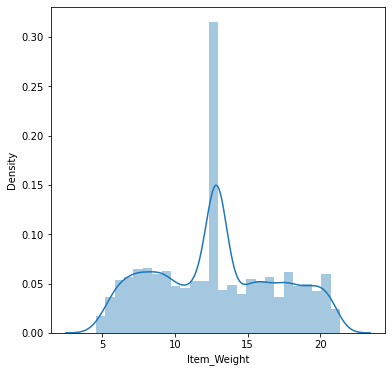

In [27]:
plt.figure(figsize=(6,6))
sns.distplot(df_train["Item_Weight"])
plt.show()

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

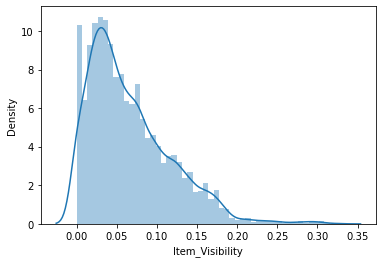

In [28]:
sns.distplot(df_train["Item_Visibility"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

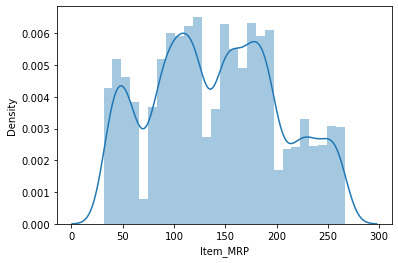

In [29]:
sns.distplot(df_train["Item_MRP"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

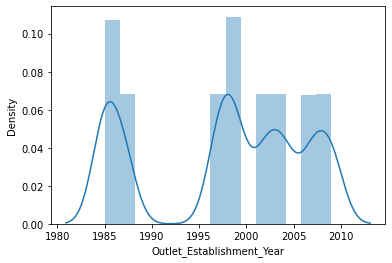

In [30]:
sns.distplot(df_train["Outlet_Establishment_Year"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

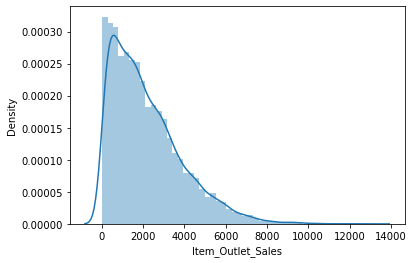

In [31]:
sns.distplot(df_train["Item_Outlet_Sales"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

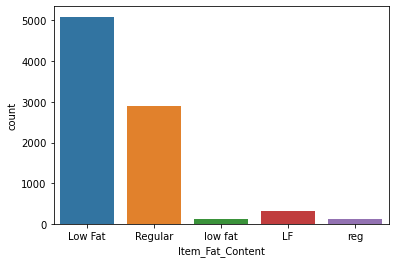

In [32]:
sns.countplot(df_train["Item_Fat_Content"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

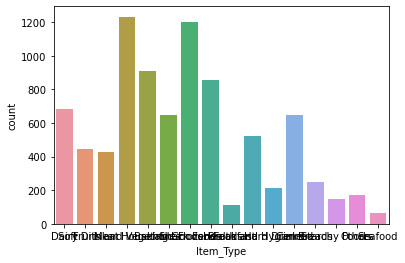

In [33]:
sns.countplot(df_train["Item_Type"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

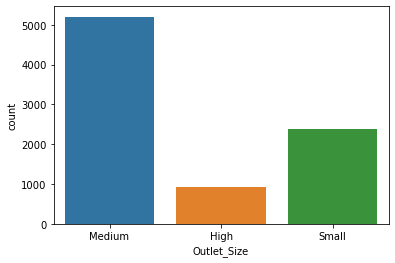

In [34]:
sns.countplot(df_train["Outlet_Size"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

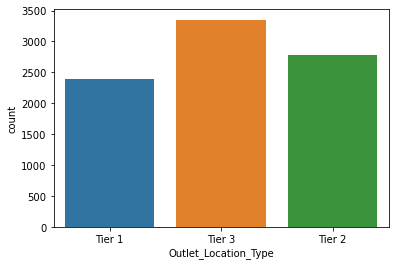

In [35]:
sns.countplot(df_train["Outlet_Location_Type"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

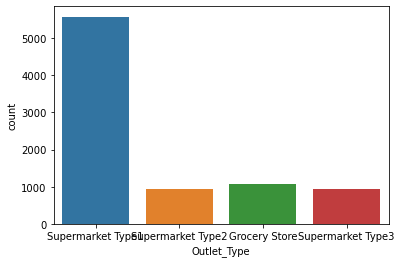

In [36]:
sns.countplot(df_train["Outlet_Type"])

In [37]:
# for test dataset

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

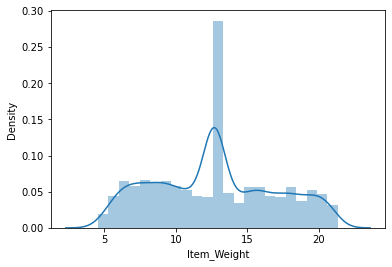

In [38]:
sns.distplot(df_test["Item_Weight"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

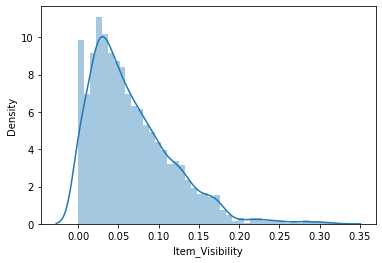

In [39]:
sns.distplot(df_test["Item_Visibility"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

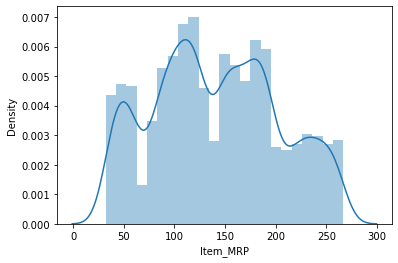

In [40]:
sns.distplot(df_test["Item_MRP"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

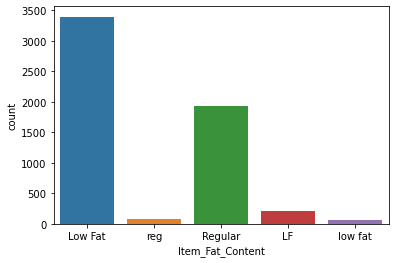

In [41]:
sns.countplot(df_test["Item_Fat_Content"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

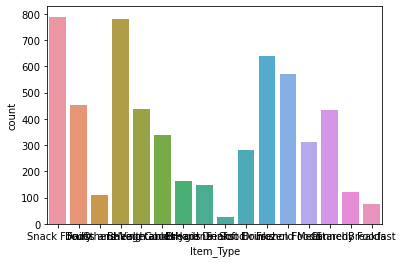

In [42]:
sns.countplot(df_test["Item_Type"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

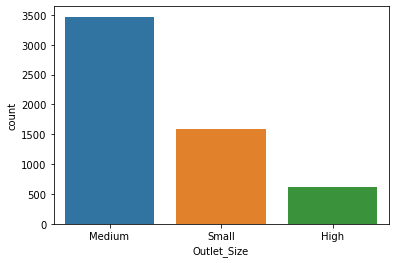

In [43]:
sns.countplot(df_test["Outlet_Size"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

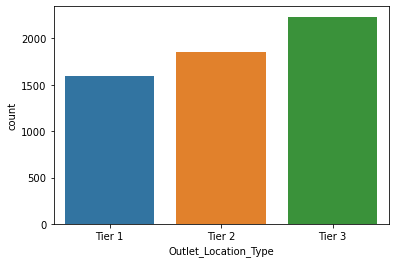

In [44]:
sns.countplot(df_test["Outlet_Location_Type"])

C:\Users\jaimo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

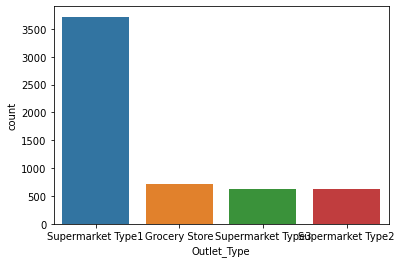

In [45]:
sns.countplot(df_test["Outlet_Type"])

# Correlation

<AxesSubplot:>

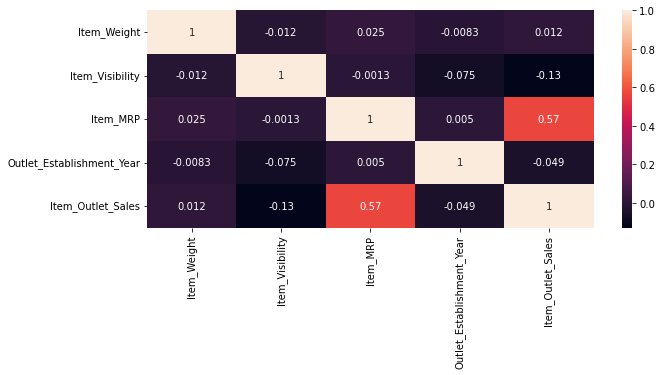

In [46]:
corrmatrix=df_train.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True)

<AxesSubplot:>

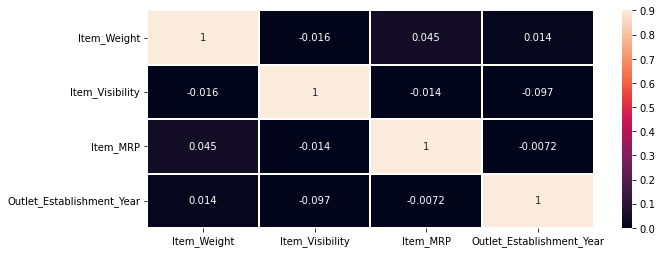

In [47]:
corrmatrix=df_test.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-0.0,vmax=0.9,linewidth=0.2,annot=True)

# Preprocessing

# label Encoding

In [48]:
df_train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Item_Fat_Content']=le.fit_transform(df_train['Item_Fat_Content']) 
df_train['Item_Type']=le.fit_transform(df_train['Item_Type']) 
df_train['Outlet_Size']=le.fit_transform(df_train['Outlet_Size']) 
df_train['Outlet_Location_Type']=le.fit_transform(df_train['Outlet_Location_Type']) 
df_train['Outlet_Type']=le.fit_transform(df_train['Outlet_Type'])




In [50]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [51]:
#label encoding on test dataset

In [52]:
df_test.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test['Item_Fat_Content']=le.fit_transform(df_test['Item_Fat_Content']) 
df_test['Item_Type']=le.fit_transform(df_test['Item_Type']) 
df_test['Outlet_Size']=le.fit_transform(df_test['Outlet_Size']) 
df_test['Outlet_Location_Type']=le.fit_transform(df_test['Outlet_Location_Type']) 
df_test['Outlet_Type']=le.fit_transform(df_test['Outlet_Type'])

In [54]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1
1,8.300000,4,0.038428,4,87.3198,2007,1,1,1
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1
4,12.695633,2,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,2,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,2,0.000000,3,214.6218,2007,1,1,1


# Splitting our data to train and test


In [55]:
x=df_train.drop('Item_Outlet_Sales',axis=1)

In [56]:
y=df_train['Item_Outlet_Sales']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

# Standarization

In [59]:
x.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.369354,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.644810,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
std_scale=StandardScaler()
x_train_std=std_scale.fit_transform(x_train)

In [62]:
x_test_std=std_scale.transform(x_test)

In [63]:
x_train_std

array([[-0.80021083,  0.97369917, -0.60070308, ..., -0.28419801,
        -1.38348228, -0.25948864],
       [ 1.21131742, -0.57161762, -0.36215854, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 1.11665727,  0.97369917,  0.19493285, ...,  1.38332526,
        -1.38348228, -0.25948864],
       ...,
       [ 1.11665727, -0.57161762, -0.91693149, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 1.76744582,  2.51901595, -0.22818684, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 0.82084429, -2.1169344 , -0.95485942, ...,  1.38332526,
        -1.38348228, -0.25948864]])

In [64]:
x_test_std

array([[ 0.33571101, -0.57161762, -0.77388703, ..., -1.95172128,
         1.08416512, -0.25948864],
       [-1.17175193, -0.57161762,  0.09797779, ...,  1.38332526,
        -1.38348228, -0.25948864],
       [ 0.38304109,  0.97369917, -0.48194218, ..., -0.28419801,
        -1.38348228, -0.25948864],
       ...,
       [ 0.38304109,  0.97369917, -0.48385674, ..., -1.95172128,
         1.08416512, -0.25948864],
       [-0.72921571,  0.97369917,  1.46010317, ..., -0.28419801,
         1.08416512,  0.9908248 ],
       [-1.17766819, -0.57161762, -0.21387994, ..., -0.28419801,
        -0.14965858, -0.25948864]])

In [65]:
y_train

549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [66]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
7205    3004.0896
3257     890.8404
6346     629.1810
6318     253.0040
6339     976.7286
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

# Model Building

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [68]:
def kfolds(model,model_name):
    model=cross_val_score(model,x,y,cv=10)
    model_score=np.average(model)
    print(f"{model_name}score on cross validation:{model_score*100}%")

In [69]:
def train(model,model_name):
    model.fit(x_train,y_train)
    model_train_score=model.score(x_train,y_train)
    model_test_score=model.score(x_test,y_test)
    print(f"{model_name}model score on Training data:{model_train_score*100}%\n{model_name}model score on Testing data:{model_test_score*100}%")

In [70]:
def r2(model,model_name):
    score=r2_score(y_test,model.predict(x_test))
    print(f"R2 score for {model_name} is {score * 100}%" )

# Randomforest  Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf_model= RandomForestRegressor()
kfolds(rf_model,"Random Forest")
train(rf_model, "Random Forest")

Random Forestscore on cross validation:55.19058757142765%
Random Forestmodel score on Training data:93.83743327741058%
Random Forestmodel score on Testing data:55.078223812624415%


In [73]:
r2(rf_model, "Random forest")

R2 score for Random forest is 55.078223812624415%


# Linear Regression Model

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr=LinearRegression()

In [76]:
kfolds(lr,"Linear Regression")
train(lr,"Linear Regression")

Linear Regressionscore on cross validation:50.52960849422461%
Linear Regressionmodel score on Training data:50.36024826044982%
Linear Regressionmodel score on Testing data:52.42478593650528%


In [77]:
r2(lr,"linear Regression")

R2 score for linear Regression is 52.42478593650528%


# GradientBoostingRegressor Model

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
gbr=GradientBoostingRegressor()
kfolds(gbr,"Gradient Boosting ")
train(gbr,"Gradient Boosting")

Gradient Boosting score on cross validation:59.50713672997567%
Gradient Boostingmodel score on Training data:63.20067375593891%
Gradient Boostingmodel score on Testing data:60.56802272828057%


In [80]:
r2(gbr,"Gradient Boosting")

R2 score for Gradient Boosting is 60.56802272828057%


# BaggingRegressor Model

In [81]:
from sklearn.ensemble import BaggingRegressor

In [82]:
br=BaggingRegressor()
kfolds(br,"Bagging")
train(br,"bagging")

Baggingscore on cross validation:52.333869191505286%
baggingmodel score on Training data:91.88255900418582%
baggingmodel score on Testing data:52.62492289640303%


In [83]:
r2(br,"bagging")

R2 score for bagging is 52.62492289640303%


# DecisionTree Regressor Model

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
dtr=DecisionTreeRegressor()
kfolds(dtr,"Decision Tree")
train(dtr,"Decision Tree")


Decision Treescore on cross validation:17.921219945137675%
Decision Treemodel score on Training data:100.0%
Decision Treemodel score on Testing data:16.085213294982324%


In [86]:
r2(dtr,"Decision Tree")

R2 score for Decision Tree is 16.085213294982324%


# Sumbission file

In [87]:
#decisiontree

In [88]:
dtr.fit(x,y)

DecisionTreeRegressor()

In [89]:
dtr.score(x,y)

1.0

In [90]:
y_pred=dtr.predict(df_test)

In [91]:
submission = pd.read_csv(r'C:\Users\jaimo\Downloads\sample_submission_8RXa3c6.csv')

In [92]:
submission['Item_Outlet_Sales']=y_pred

In [93]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2908.2144
1,FDW14,OUT017,265.6542
2,NCN55,OUT010,1775.6886
3,FDQ58,OUT017,3778.4150
4,FDY38,OUT027,6705.2718


In [94]:
submission.to_csv("C:\\Users\\jaimo\\Downloads\\dtr1.csv",index=False)

In [95]:
df2=pd.read_csv(r'C:\\Users\\jaimo\\Downloads\\dtr1.csv')

In [96]:
df2.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2908.2144
1,FDW14,OUT017,265.6542
2,NCN55,OUT010,1775.6886
3,FDQ58,OUT017,3778.4150
4,FDY38,OUT027,6705.2718


In [97]:
#Bagging Model

In [98]:
br.fit(x,y)

BaggingRegressor()

In [99]:
br.score(x,y)

0.9130057922428897

In [100]:
y_pred=br.predict(df_test)

In [101]:
submission['Item_Outlet_Sales']=y_pred

In [102]:
submission.to_csv("C:\\Users\\jaimo\\Downloads\\br.csv",index=False)

# randomforest

In [103]:
rf_model.fit(x,y)

RandomForestRegressor()

In [104]:
rf_model.score(x,y)

0.937989806296764

In [105]:
y_pred=rf_model.predict(df_test)

In [106]:
submission['Item_Outlet_Sales']=y_pred

In [107]:
submission.to_csv("C:\\Users\\jaimo\\Downloads\\rf_model.csv",index=False)